In [2]:
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt 
import math
import arviz as az
import numpy as np
from scipy.optimize import curve_fit

In [3]:
%config Inline.figure_format = 'retina'
az.style.use('arviz-darkgrid')

# Power law used to fit the connectivity distribution
def power_law(x, a, b):
    return a*np.power(x, -b)

In [4]:
quakes = pd.read_csv('eventsUniqueOnly.csv',index_col=False)
quakes

,Unnamed: 0,eventType,eventDescription,times,amplitude
0,0,earthquake,unclassified deep moonquake,1969-07-27 23:48:00+00:00,3.1
1,2,earthquake,deep moonquake,1969-07-28 13:49:00+00:00,3.7
2,7,earthquake,unclassified deep moonquake,1969-08-24 06:18:00+00:00,5.1
3,8,earthquake,deep moonquake,1969-08-25 00:30:00+00:00,4.0
4,12,earthquake,deep moonquake,1969-11-28 03:39:00+00:00,-1.0
...,...,...,...,...,...
2278,12958,earthquake,deep moonquake,1977-09-09 17:12:00+00:00,3.5
2279,12986,earthquake,deep moonquake,1977-09-11 21:36:00+00:00,-1.0
2280,13032,earthquake,unclassified deep moonquake,1977-09-23 17:50:00+00:00,6.0
2281,13036,earthquake,deep moonquake,1977-09-24 12:48:00+00:00,6.0


In [5]:
quakes = quakes[quakes.amplitude > 0]

In [6]:
quakes.reset_index(inplace=True)

In [7]:
quakes

,index,Unnamed: 0,eventType,eventDescription,times,amplitude
0,0,0,earthquake,unclassified deep moonquake,1969-07-27 23:48:00+00:00,3.1
1,1,2,earthquake,deep moonquake,1969-07-28 13:49:00+00:00,3.7
2,2,7,earthquake,unclassified deep moonquake,1969-08-24 06:18:00+00:00,5.1
3,3,8,earthquake,deep moonquake,1969-08-25 00:30:00+00:00,4.0
4,5,14,earthquake,deep moonquake,1969-11-29 09:10:00+00:00,1.0
...,...,...,...,...,...,...
2074,2272,12850,earthquake,deep moonquake,1977-08-14 22:05:00+00:00,5.0
2075,2275,12938,earthquake,deep moonquake,1977-09-06 07:00:00+00:00,3.0
2076,2278,12958,earthquake,deep moonquake,1977-09-09 17:12:00+00:00,3.5
2077,2280,13032,earthquake,unclassified deep moonquake,1977-09-23 17:50:00+00:00,6.0


In [9]:
types=[]
for item in quakes['eventDescription']:
    types.append(item)

In [10]:
def unique(list1):
     
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    for x in unique_list:
        print(x)

In [11]:
unique(types)

deep moonquake
unclassified deep moonquake


In [12]:
min(quakes['amplitude'])

0.5

In [13]:
max(quakes['amplitude'])

12.0

In [7]:
quakes['times'] = pd.to_datetime(quakes['times'])
quakes['times']

<ipython-input-7-02f46f2607ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quakes['times'] = pd.to_datetime(quakes['times'])


0      1969-07-27 23:48:00+00:00
1      1969-07-28 13:49:00+00:00
2      1969-08-24 06:18:00+00:00
3      1969-08-25 00:30:00+00:00
4      1969-11-29 09:10:00+00:00
                  ...           
2074   1977-08-14 22:05:00+00:00
2075   1977-09-06 07:00:00+00:00
2076   1977-09-09 17:12:00+00:00
2077   1977-09-23 17:50:00+00:00
2078   1977-09-24 12:48:00+00:00
Name: times, Length: 2079, dtype: datetime64[ns, UTC]

In [8]:
type(quakes['times'][0])

pandas._libs.tslibs.timestamps.Timestamp

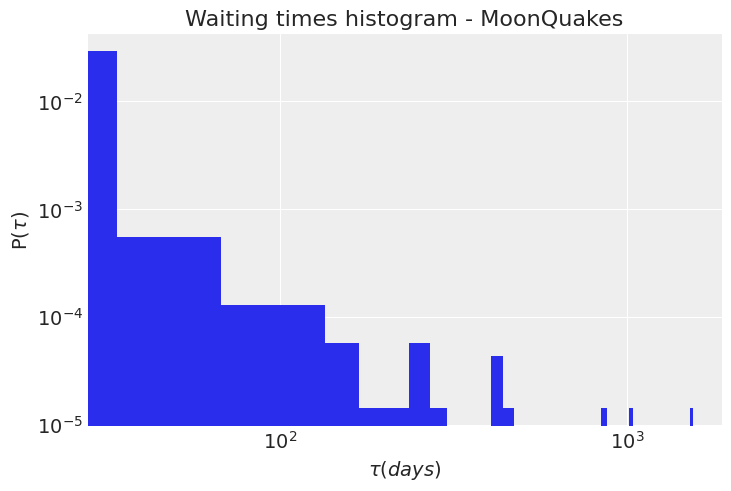

In [9]:
# Waiting Times without delta 
wtid = []

for i in range(len(quakes['amplitude'])):
    if quakes['amplitude'][i]<max(quakes['amplitude']):
        firstEvent = quakes['times'][i]

        for j in range(i+1,len(quakes['amplitude'])):
            if quakes['amplitude'][j]>=quakes['amplitude'][i]:
                secondEvent = quakes['times'][j]
                wtid.append((secondEvent-firstEvent).days)
                if (secondEvent-firstEvent).days < 0:
                    print(secondEvent)
                    print(firstEvent)
                break;


hist, bins, patches = plt.hist(wtid,bins=round(math.sqrt(len(wtid))),density=True) 
plt.xscale('log')
plt.xlabel(r'$\tau(days)$', fontsize=14)
plt.yscale('log')
plt.ylabel(r'P($\tau$)', fontsize=14)
plt.title('Waiting times histogram - MoonQuakes')
plt.savefig("waitingTimesMoonHistogram.png")

In [72]:
for item in wtid:
    if item<2:
        print(item)

1
1
1
1
1
0
0
0
0
0
1
0
1
1
1
0
1
0
0
0
0
1
1
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
1
1
1
0
0
0
0
0
1
1
1
1
1
0
0
0
1
0
1
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
1
1
1
0
1
1
0
1
1
0
1
1
0
0
0
0
1
1
0
0
0
0
1
0
0
1
1
1
0
0
0
1
0
1
1
1
0
0
1
1
1
1
1
1
0
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
1
1
1
1
0
1
1
1
0
0
0
0
1
1
1
1
0
1
1
1
1
1
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
1
0
0
1
1
1
1
1
1
1
0
0
0
0
0
1
1
0
0
1
0
1
0
1
1
1
1
1
1
0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
1
0
1
0
0
0
1
0
1
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
1
0
0
1
1
1
1
0
1
1
1
1
1
1
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
1
1
0
0
0
1
1
1
1
0
0
1
1
1
1
1
0
0
0
0


Text(0, 0.5, 'P($\\tau$)')

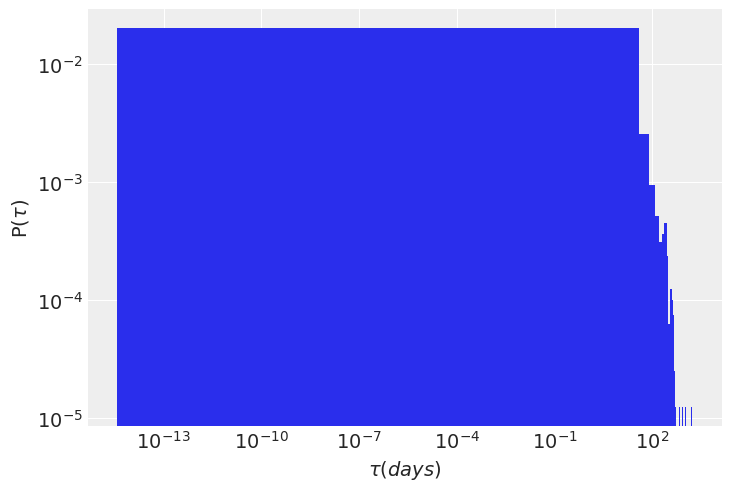

In [74]:
wtid = []
for i in range(len(quakes['amplitude'])):
    if quakes['amplitude'][i]<max(quakes['amplitude'])-1.5:
        firstEvent = quakes['times'][i]

        for j in range(i+1,len(quakes['amplitude'])):
            if quakes['amplitude'][j]>=quakes['amplitude'][i]+1.5:
                secondEvent = quakes['times'][j]
                wtid.append((secondEvent-firstEvent).days)
                if (secondEvent-firstEvent).days < 0:
                    print(secondEvent)
                    print(firstEvent)
                break;
hist, bins, patches = plt.hist(wtid,bins=round(math.sqrt(len(wtid))),density=True) 
plt.xscale('log')
plt.xlabel(r'$\tau(days)$', fontsize=14)
plt.yscale('log')
plt.ylabel(r'P($\tau$)', fontsize=14)

In [60]:
hist

array([2.00143804e-02, 2.52839578e-03, 9.38760808e-04, 5.13189242e-04,
       3.12920269e-04, 3.62987512e-04, 4.50605188e-04, 2.37819405e-04,
       6.25840539e-05, 1.25168108e-04, 1.00134486e-04, 7.51008646e-05,
       2.50336215e-05, 1.25168108e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.25168108e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.25168108e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.25168108e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.25168108e-05, 0.00000000e+00, 1.25168108e-05,
       1.25168108e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.25168108e-05])

In [61]:
bins

array([   0.        ,   38.68888889,   77.37777778,  116.06666667,
        154.75555556,  193.44444444,  232.13333333,  270.82222222,
        309.51111111,  348.2       ,  386.88888889,  425.57777778,
        464.26666667,  502.95555556,  541.64444444,  580.33333333,
        619.02222222,  657.71111111,  696.4       ,  735.08888889,
        773.77777778,  812.46666667,  851.15555556,  889.84444444,
        928.53333333,  967.22222222, 1005.91111111, 1044.6       ,
       1083.28888889, 1121.97777778, 1160.66666667, 1199.35555556,
       1238.04444444, 1276.73333333, 1315.42222222, 1354.11111111,
       1392.8       , 1431.48888889, 1470.17777778, 1508.86666667,
       1547.55555556, 1586.24444444, 1624.93333333, 1663.62222222,
       1702.31111111, 1741.        ])

In [62]:
# Create the data x,y from the hist and bins
# x = bins centers . First create empty array of the length of hist
x = np.zeros_like(hist)
# Append to it the centers of the bins
for i in range(1,len(bins)):
    x[i-1]=((bins[i]+bins[i-1])/2)

# Check for zeros in the hist list and cut both x and y where the first zero occurs
for i in range(len(hist)):
    if hist[i]==0:
        y=np.array(hist[:i])
        x=np.array(x[:i])
        break
    # If there is no zeros, make y=hist ( full data is taken into acoount)
    else:
        y=hist

# Renormalize the ydata to 1 
y_norm = [float(i)/sum(y) for i in y]

In [65]:
x

array([ 19.34444444,  58.03333333,  96.72222222, 135.41111111,
       174.1       , 212.78888889, 251.47777778, 290.16666667,
       328.85555556, 367.54444444, 406.23333333, 444.92222222,
       483.61111111, 522.3       ])

In [66]:
y_norm

[0.7769679300291544,
 0.09815354713313897,
 0.036443148688046656,
 0.019922254616132166,
 0.012147716229348881,
 0.014091350826044713,
 0.017492711370262374,
 0.009232264334305155,
 0.002429543245869778,
 0.004859086491739549,
 0.0038872691933916448,
 0.0029154518950437335,
 0.0009718172983479097,
 0.00048590864917395484]

Text(0.5, 0.98, 'Waiting Times MoonQuakes')

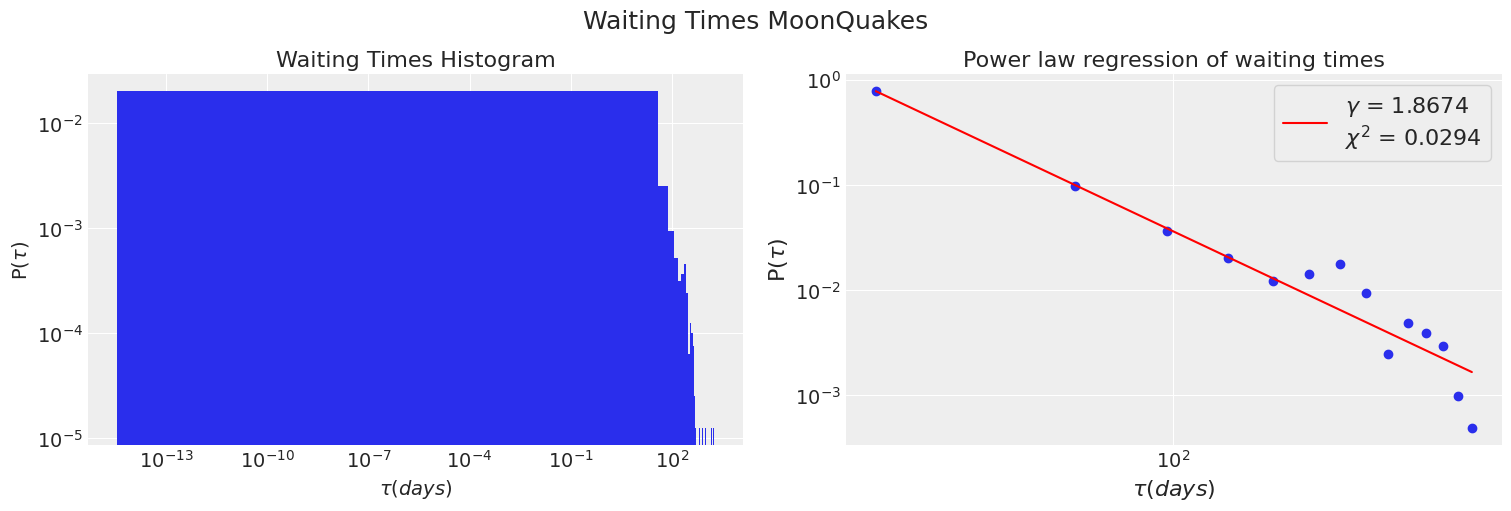

In [64]:
# Compute the power_law fit to our data 
pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)
# Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))

# Plot the results
fig, ax = plt.subplots(1,2,figsize=(15,5))

# Histogram of degrees
ax[0].hist(wtid,bins=round(math.sqrt(len(wtid))),density=True)
ax[0].set_xscale('log')
ax[0].set_yscale('log')


# Title of histogram
ax[0].set_title('Waiting Times Histogram')
ax[0].set_xlabel(r'$\tau(days)$', fontsize=14)
ax[0].set_ylabel(r'P($\tau$)', fontsize=14)


# Connectivity distribution ( data + fit)
# The data, scattered
ax[1].scatter(x,y_norm)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
# The fit
ax[1].plot(x,power_law(x,*pars),
           label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
           color='red')

# Setting ticks
#ax[1].set_xticks([10, 20, 50, 100])
#ax[1].set_yticks([1.00, 0.1, 0.01, 0.001, 0.0001])
#ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# Legend : gamma coefficient of fit and chi_squared goodness of fit
ax[1].legend(loc='upper right',fontsize=16,frameon=True)

# Title of connectivity distribution ( data + fit )
ax[1].set_title('Power law regression of waiting times')
ax[1].set_xlabel(r'$\tau(days)$', fontsize=16)
ax[1].set_ylabel(r'P($\tau$)', fontsize=16);

plt.suptitle('Waiting Times MoonQuakes', fontsize = 18)
#plt.savefig("waitingTimesMoonRegression.png")

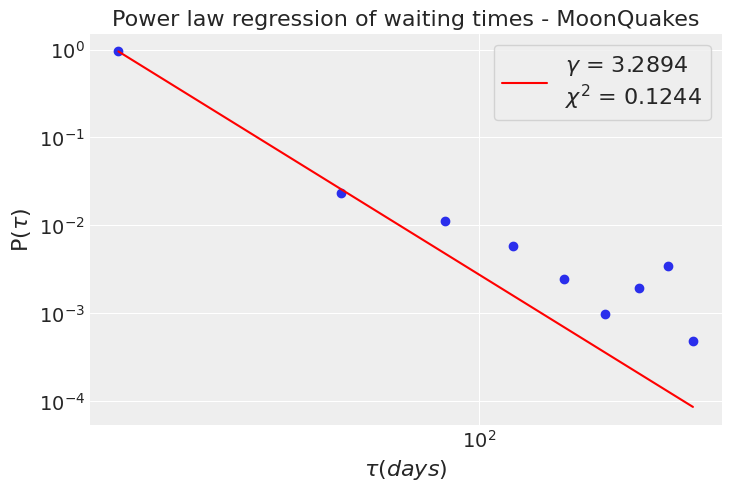

In [53]:
plt.figure()

# The data, scattered
plt.scatter(x,y_norm)
plt.xscale('log')
plt.yscale('log')
# The fit
plt.plot(x,power_law(x,*pars),
           label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
           color='red')

# Legend : gamma coefficient of fit and chi_squared goodness of fit
plt.legend(loc='upper right',fontsize=16,frameon=True)

# Title of connectivity distribution ( data + fit )
plt.title('Power law regression of waiting times - MoonQuakes')
plt.xlabel(r'$\tau(days)$', fontsize=16)
plt.ylabel(r'P($\tau$)', fontsize=16);

plt.savefig("waitingTimesMoonOnlyRegression.png")

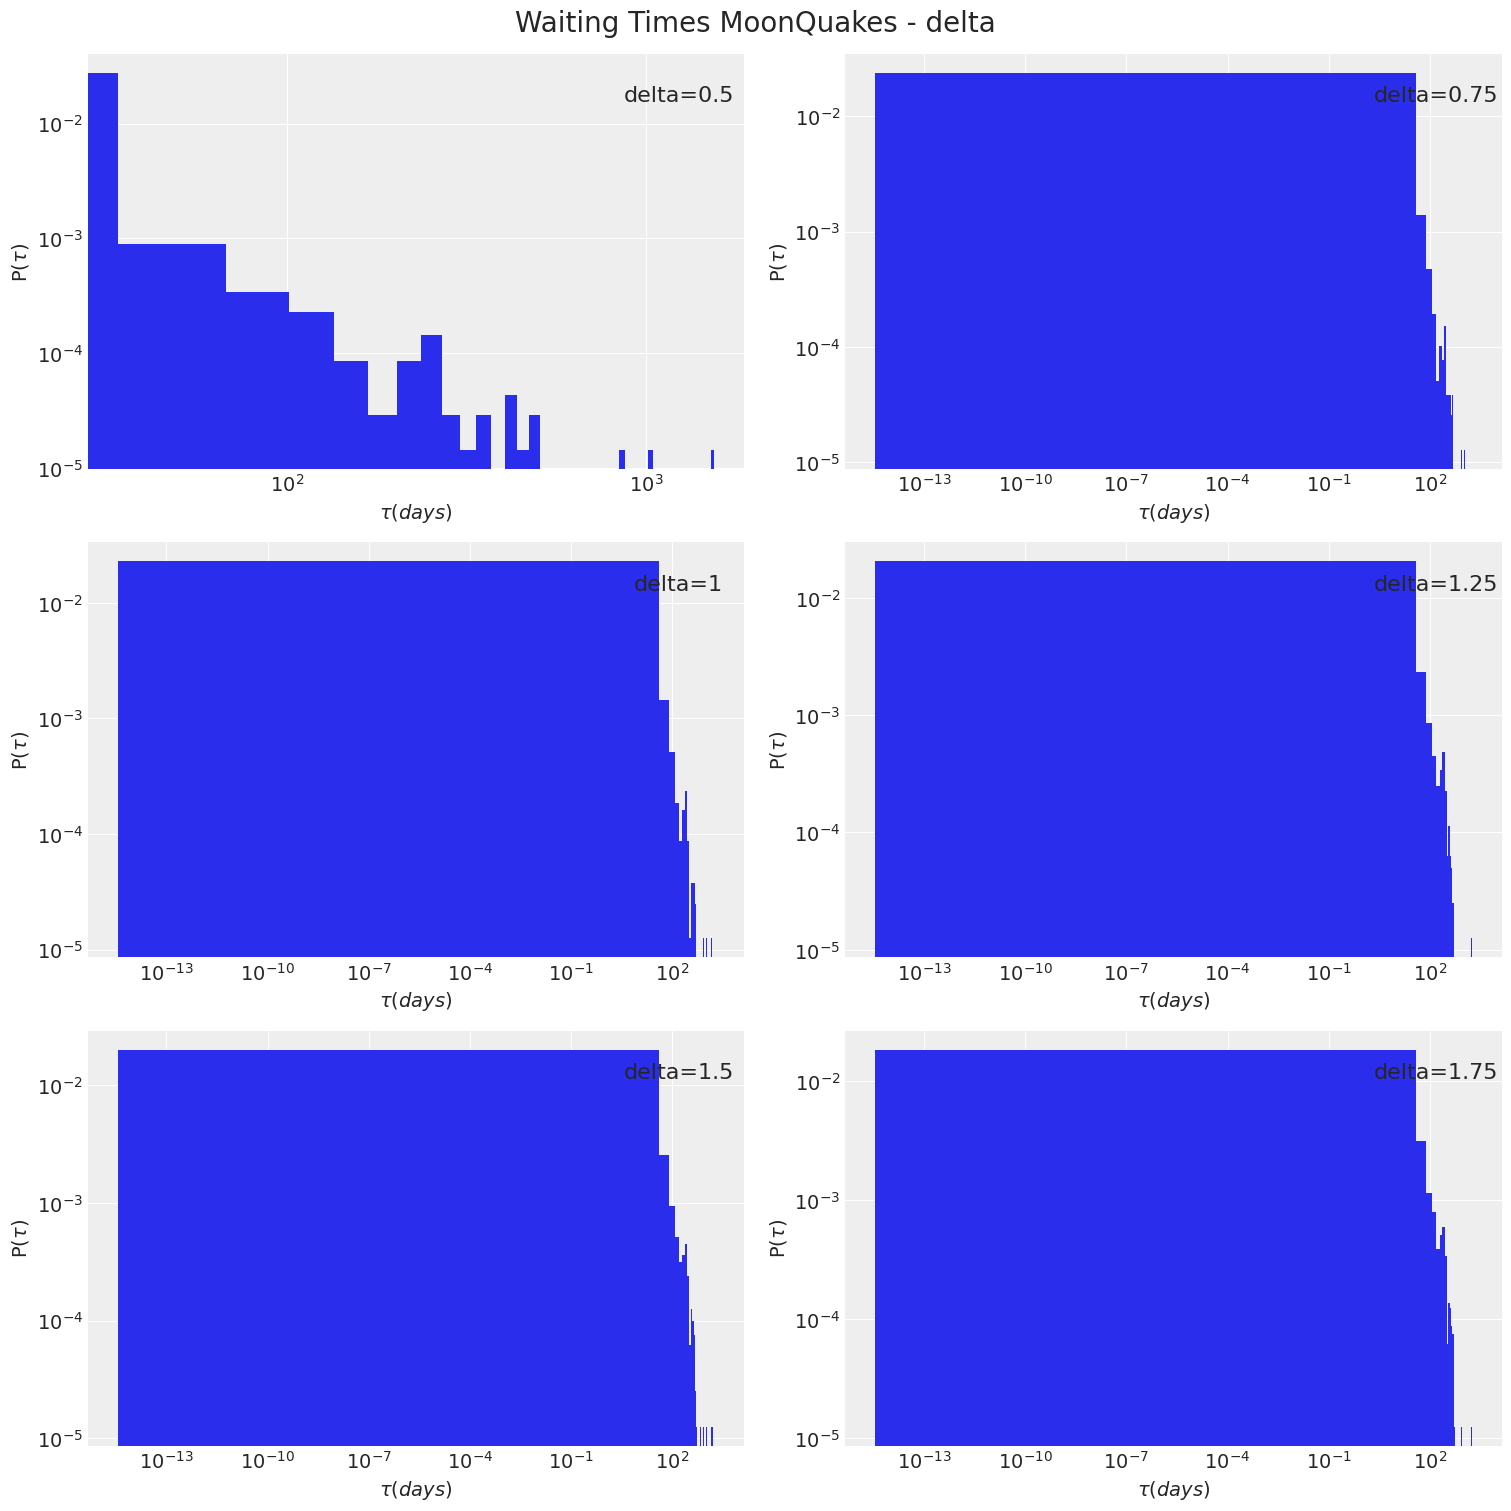

In [54]:
# Make 6 plots using different deltas

fig, ax = plt.subplots(3, 2, figsize=(15,15))#, sharex=True, sharey=True)

ax = np.ravel(ax)
delta =[0.5, 0.75, 1, 1.25, 1.5, 1.75]

for k in range(len(delta)):
    wtid = []
    
    for i in range(len(quakes['amplitude'])):
        if quakes['amplitude'][i]<max(quakes['amplitude'])-delta[k]:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['amplitude'])):
                if quakes['amplitude'][j]>=quakes['amplitude'][i]+delta[k]:
                    secondEvent = quakes['times'][j]
                    wtid.append((secondEvent-firstEvent).days)
                    break;

    #wtid = waitingTimes2(quakes, delta[i])
    ax[k].hist(wtid, bins=round(math.sqrt(len(wtid))),density=True)
    ax[k].set_xscale('log')
    ax[k].set_yscale('log')
    ax[k].text(0.9, 0.9, f'delta={delta[k]}', ha='center', va='center',fontsize=16, transform=ax[k].transAxes)
    ax[k].set_xlabel(r'$\tau(days)$', fontsize=14)
    ax[k].set_ylabel(r'P($\tau$)', fontsize=14)

#t.tight_layout()
plt.suptitle('Waiting Times MoonQuakes - delta',fontsize=20)
plt.savefig("waitingTimesMoonDeltaHistograms.png")

In [55]:
# DELTA POSITIVE FULL REGRESS

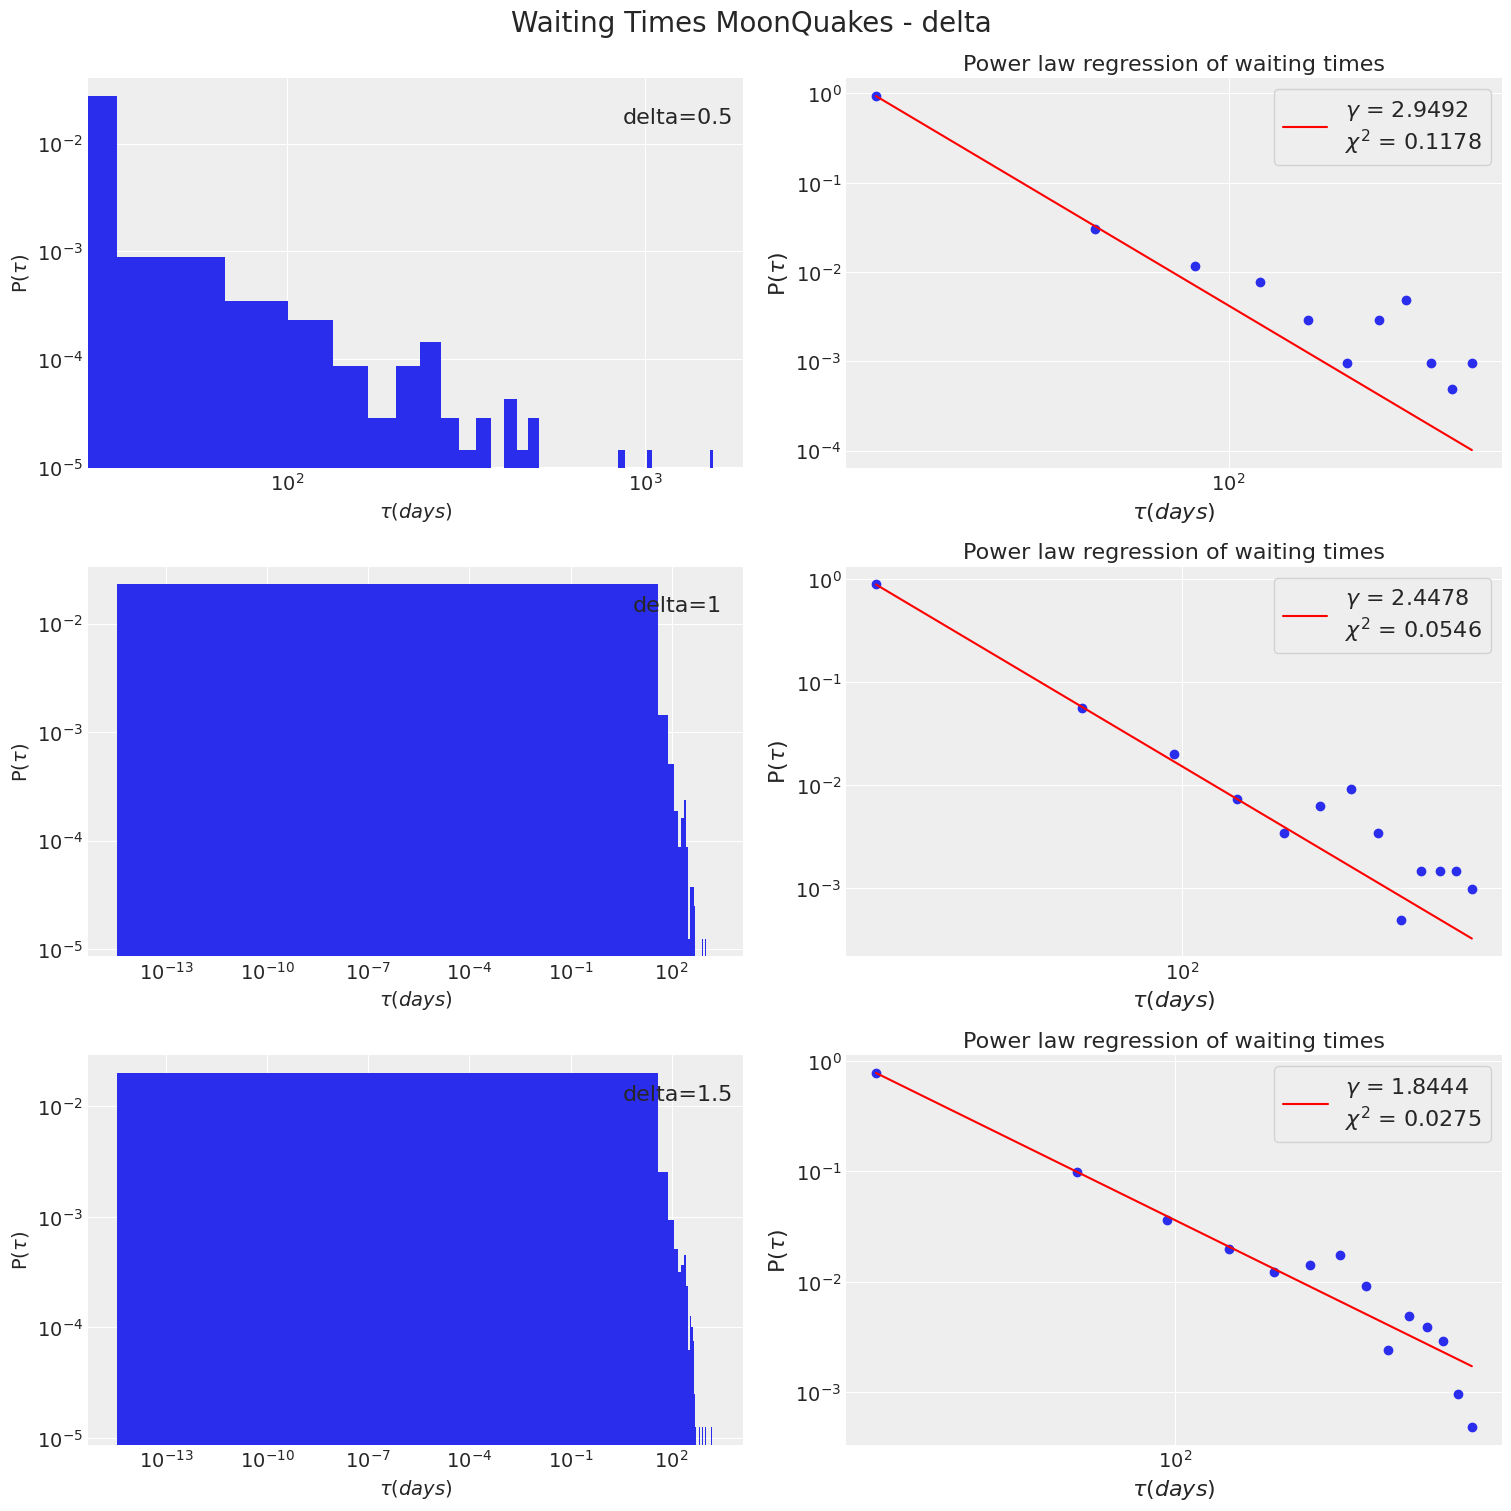

In [56]:
# Make 6 plots using different deltas

fig, axs = plt.subplots(3, 2, figsize=(15,15))#, sharex=True, sharey=True)

delta =[0.5, 1, 1.5]

for k in range(len(delta)):
    wtid = []
    
    for i in range(len(quakes['amplitude'])):
        if quakes['amplitude'][i]<max(quakes['amplitude'])-delta[k]:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['amplitude'])):
                if quakes['amplitude'][j]>=quakes['amplitude'][i]+delta[k]:
                    secondEvent = quakes['times'][j]
                    wtid.append((secondEvent-firstEvent).days)
                    break;
        

    axs[k,0].hist(wtid, bins=round(math.sqrt(len(wtid))),density=True)
    axs[k,0].set_xscale('log')
    axs[k,0].set_yscale('log')
    axs[k,0].text(0.9, 0.9, f'delta={delta[k]}', ha='center', va='center',fontsize=16, transform=axs[k,0].transAxes)
    axs[k,0].set_xlabel(r'$\tau(days)$', fontsize=14)
    axs[k,0].set_ylabel(r'P($\tau$)', fontsize=14)
    
    # Regressions 
    
    hist,bins = np.histogram(wtid, bins=round(math.sqrt(len(wtid))))
    # Create the data x,y from the hist and bins
    # x = bins centers . First create empty array of the length of hist
    x = np.zeros_like(hist)
    # Append to it the centers of the bins
    for i in range(1,len(bins)):
        x[i-1]=((bins[i]+bins[i-1])/2)

    # Check for zeros in the hist list and cut both x and y where the first zero occurs
    for i in range(len(hist)):
        if hist[i]==0:
            y=np.array(hist[:i])
            x=np.array(x[:i])
            break
        # If there is no zeros, make y=hist ( full data is taken into acoount)
        else:
            y=hist

    # Renormalize the ydata to 1 
    y_norm = [float(i)/sum(y) for i in y]

    
    # Compute the power_law fit to our data 
    pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)
    # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
    chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
    
    
    # Connectivity distribution ( data + fit)
    # The data, scattered
    axs[k,1].scatter(x,y_norm)
    axs[k,1].set_xscale('log')
    axs[k,1].set_yscale('log')
    # The fit
    axs[k,1].plot(x,power_law(x,*pars),
               label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
               color='red')
    
    # Legend : gamma coefficient of fit and chi_squared goodness of fit
    axs[k,1].legend(loc='upper right',fontsize=16,frameon=True)

    # Title of connectivity distribution ( data + fit )
    axs[k,1].set_title('Power law regression of waiting times')
    axs[k,1].set_xlabel(r'$\tau(days)$', fontsize=16)
    axs[k,1].set_ylabel(r'P($\tau$)', fontsize=16);
    

plt.suptitle('Waiting Times MoonQuakes - delta ',fontsize=20)
plt.savefig("waitingTimesMoonDelta.png")

In [57]:
# Delta negative full regress

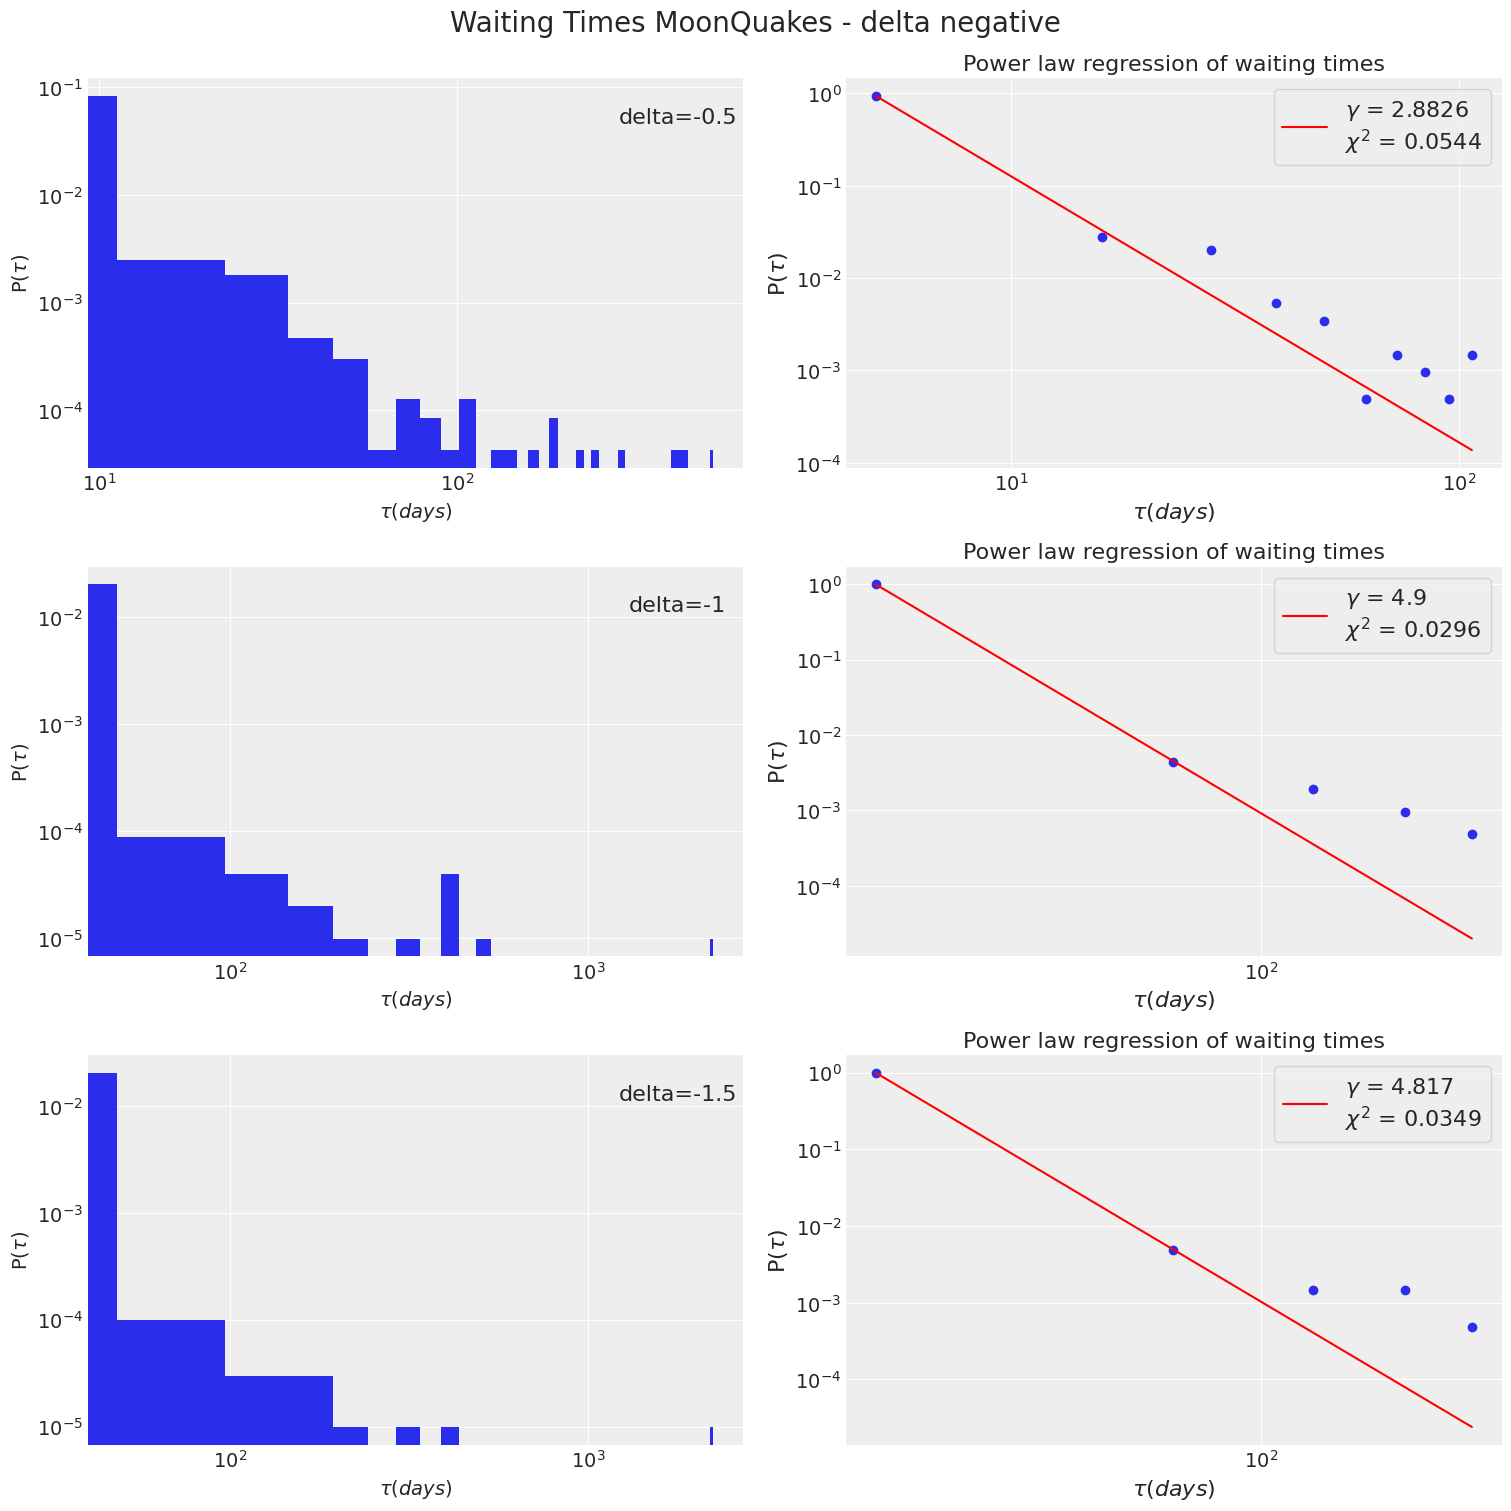

In [58]:
# Make 6 plots using different deltas

fig, axs = plt.subplots(3, 2, figsize=(15,15))#, sharex=True, sharey=True)

delta =[-0.5, -1, -1.5]

for k in range(len(delta)):
    wtid = []
    
    for i in range(len(quakes['amplitude'])):
        if quakes['amplitude'][i]<max(quakes['amplitude'])-delta[k]:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['amplitude'])):
                if quakes['amplitude'][j]>=quakes['amplitude'][i]+delta[k]:
                    secondEvent = quakes['times'][j]
                    wtid.append((secondEvent-firstEvent).days)
                    break;
        
    #wtid = waitingTimes2(quakes, delta[i])
    axs[k,0].hist(wtid, bins=round(math.sqrt(len(wtid))),density=True)
    axs[k,0].set_xscale('log')
    axs[k,0].set_yscale('log')
    axs[k,0].text(0.9, 0.9, f'delta={delta[k]}', ha='center', va='center',fontsize=16, transform=axs[k,0].transAxes)
    axs[k,0].set_xlabel(r'$\tau(days)$', fontsize=14)
    axs[k,0].set_ylabel(r'P($\tau$)', fontsize=14)
    
    # Regressions 
    
    hist,bins = np.histogram(wtid, bins=round(math.sqrt(len(wtid))))
    # Create the data x,y from the hist and bins
    # x = bins centers . First create empty array of the length of hist
    x = np.zeros_like(hist)
    # Append to it the centers of the bins
    for i in range(1,len(bins)):
        x[i-1]=((bins[i]+bins[i-1])/2)

    # Check for zeros in the hist list and cut both x and y where the first zero occurs
    for i in range(len(hist)):
        if hist[i]==0:
            y=np.array(hist[:i])
            x=np.array(x[:i])
            break
        # If there is no zeros, make y=hist ( full data is taken into acoount)
        else:
            y=hist

    # Renormalize the ydata to 1 
    y_norm = [float(i)/sum(y) for i in y]

    
    # Compute the power_law fit to our data 
    pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)
    # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
    chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
    
    
    # Connectivity distribution ( data + fit)
    # The data, scattered
    axs[k,1].scatter(x,y_norm)
    axs[k,1].set_xscale('log')
    axs[k,1].set_yscale('log')
    # The fit
    axs[k,1].plot(x,power_law(x,*pars),
               label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
               color='red')
    
    # Legend : gamma coefficient of fit and chi_squared goodness of fit
    axs[k,1].legend(loc='upper right',fontsize=16,frameon=True)

    # Title of connectivity distribution ( data + fit )
    axs[k,1].set_title('Power law regression of waiting times')
    axs[k,1].set_xlabel(r'$\tau(days)$', fontsize=16)
    axs[k,1].set_ylabel(r'P($\tau$)', fontsize=16);
    

plt.suptitle('Waiting Times MoonQuakes - delta negative',fontsize=20)
plt.savefig("waitingTimesMoonDeltaNegative.png")

In [ ]:
# ONLY REGRESSIONS

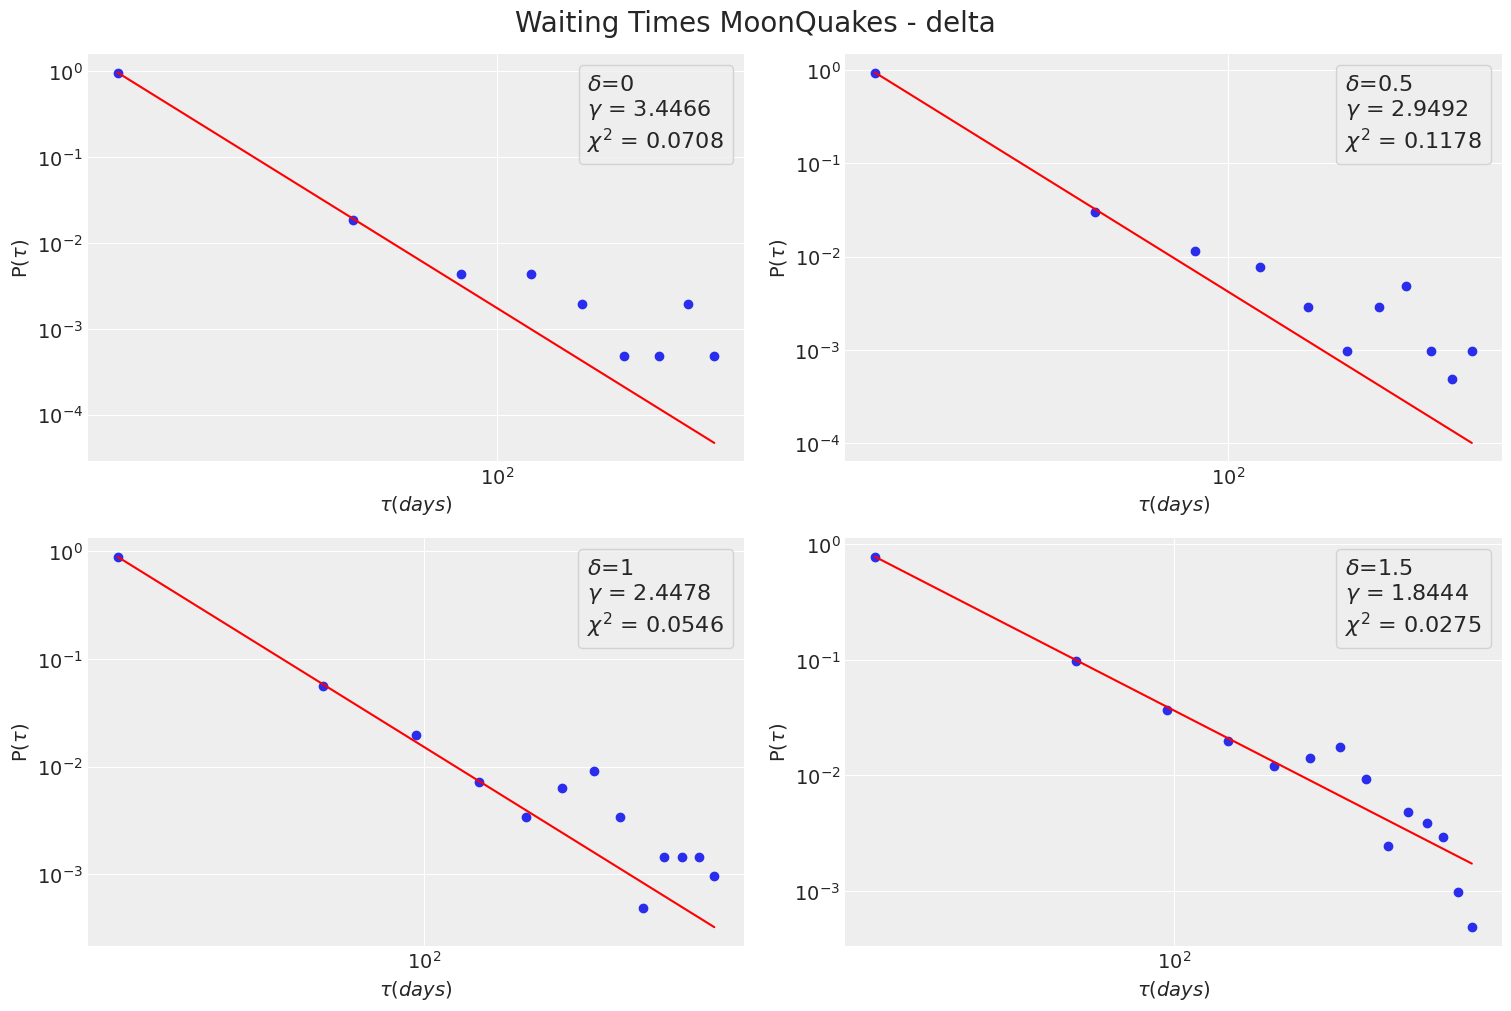

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))#, sharex=True, sharey=True)

ax = np.ravel(ax)
delta =[0, 0.5, 1, 1.5]

for k in range(len(delta)):
    wtid = []
    
    for i in range(len(quakes['amplitude'])):
        if quakes['amplitude'][i]<max(quakes['amplitude'])-delta[k]:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['amplitude'])):
                if quakes['amplitude'][j]>=quakes['amplitude'][i]+delta[k]:
                    secondEvent = quakes['times'][j]
                    wtid.append((secondEvent-firstEvent).days)
                    break;

    #wtid = waitingTimes2(quakes, delta[i])
    #ax[k].hist(wtid, bins=round(math.sqrt(len(wtid))),density=True)
    
    # Regressions 
    
    hist,bins = np.histogram(wtid, bins=round(math.sqrt(len(wtid))))
    # Create the data x,y from the hist and bins
    # x = bins centers . First create empty array of the length of hist
    x = np.zeros_like(hist)
    # Append to it the centers of the bins
    for i in range(1,len(bins)):
        x[i-1]=((bins[i]+bins[i-1])/2)

    # Check for zeros in the hist list and cut both x and y where the first zero occurs
    for i in range(len(hist)):
        if hist[i]==0:
            y=np.array(hist[:i])
            x=np.array(x[:i])
            break
        # If there is no zeros, make y=hist ( full data is taken into acoount)
        else:
            y=hist

    # Renormalize the ydata to 1 
    y_norm = [float(i)/sum(y) for i in y]

    
    # Compute the power_law fit to our data 
    pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)
    # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
    chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
    
    
    # Connectivity distribution ( data + fit)
    # The data, scattered
    ax[k].scatter(x,y_norm)
    ax[k].set_xscale('log')
    ax[k].set_yscale('log')
    # The fit
    ax[k].plot(x,power_law(x,*pars),
               label=f'$\delta$={delta[k]}\n$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
               color='red')
    
    # Legend : gamma coefficient of fit and chi_squared goodness of fit
    ax[k].legend(handlelength=0, handletextpad=0,loc='upper right',fontsize=16,frameon=True)

    # Title of connectivity distribution ( data + fit )
    ax[k].set_xlabel(r'$\tau(days)$', fontsize=16)
    ax[k].set_ylabel(r'P($\tau$)', fontsize=16);
    
    ax[k].set_xscale('log')
    ax[k].set_yscale('log')
    ax[k].set_xlabel(r'$\tau(days)$', fontsize=14)
    ax[k].set_ylabel(r'P($\tau$)', fontsize=14)


plt.suptitle('Waiting Times MoonQuakes - delta',fontsize=20)
plt.savefig("waitingTimesMoon.png")